In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
from transformers import pipeline
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
df=pd.read_csv('/content/drive/MyDrive/VR.csv')
df.tail()

,ID,Age,Gender,Race,Occupation,Education,Annual income (USD),What VR headset (or head-mounted display) do you use for SVR?,Which Social Virtual Reality (SVR) platform do you use the most? - Selected Choice,For how long did you use the main platform?,How often do you use your main platform (in hours per week)? - 1,How do you feel being anonymous in a virtual space?,What does it mean for you to be represented by the avatar in SVR?,When and why do you 'mute' other SVR users (if ever)?,How does it feel when people you know make eye contact and/or stare at you in SVR? Why?,How does it feel when strangers make eye contact and/or stare at you in SVR? Why?,What do you feel when someone known to you tries to virtually touch you? Why?,What do you feel when a stranger tries to virtually touch you? Why?,"Have you ever felt unsafe during interactions with others? If yes, in what situations and why?"
99,svr67,22,Non-binary / third gender,White,Unemployed,Trade school,$15 000 - 34 999,Valve Index,VR Chat,More than a year,4,"It feels so liberating and free, being able to...",Having an avatar that reflects me as a person ...,Since I mostly play in a group of people that ...,"If I know them, it's likely they're just jokin...","This is much more uncomfortable. In VRChat, I ...",It doesn't bother me at all. Everyone I know w...,"It still doesn't really bother me, but I'm muc...","During my first times playing VRChat, before I..."
100,svr74,28,Non-binary / third gender,White,Art Director,High School Diploma,$15 000 - 34 999,PS4 VR,Neos VR,Around a year,5,can give room to experiment things about us th...,a sense of individual and free expression,when they are too loud or annoying or bad people,"Weird, because we are designed to recognize ey...","Weird, because we are designed to recognize ey...",Usually is ok since i dont feel anything in re...,Usually is ok since i dont feel anything in re...,i dont think so because i am careful about tha...
101,svr98,25,Non-binary / third gender,White,Translator,Master's degree,$15 000 - 34 999,Oculus Quest 2,RecRoom,Around 6 months,6,"It gives me a bit more confidence, compared to...",I feel closer to my view of myself (as my orig...,"I mute other SVR users if they are being mean,...","Compared to real life, where it bothers me, I ...",I'll answer the same as I did on the previous ...,"I often forget I'm in virtual reality so, to m...","Assuming they're doing it to bother me, I feel...","Fortunately, I have not."
102,svr100,30,Non-binary / third gender,Mixed race,part-time,Bachelor's degree,Less than $15 000,no,AltSpaceVR,More than a year,8,I feel fine about it.,Just that it' something that resembles me or m...,I mute when they are being too annoying or usi...,"It feels cool like it's almost real, but it's ...",It feels a little weird sometimes to be honest...,I don't feel anything to be honest. it's just ...,"Well I feel creeped out honestly, that's why I...",The only time I felt unsafe in VR was when a u...
103,svr120,25,Non-binary / third gender,Black,Student,Bachelor's degree,Less than $15 000,VRG Pro,Facebook/Meta Spaces,More than a year,6,I have no issues with it but mainly use it to ...,I get to see myself/others like me get to see ...,When I'm at a populated area of the simulation...,I don't have a problem with it bdcuase they ar...,It's a safe space so I usually don't pay much ...,I have no problem with it. I welcome it as lon...,Obviously alarmed but if it's not inapprop the...,No I make sure to gaurd my personal informatio...


In [58]:
print(df.columns)

Index(['ID', 'Age', 'Gender', 'Race', 'Occupation', 'Education',
       'Annual income (USD)',
       'What VR headset (or head-mounted display) do you use for SVR?',
       'Which Social Virtual Reality (SVR) platform do you use the most? - Selected Choice',
       'For how long did you use the main platform?',
       'How often do you use your main platform (in hours per week)? - 1',
       'How do you feel being anonymous in a virtual space?',
       'What does it mean for you to be represented by the avatar in SVR?',
       'When and why do you 'mute' other SVR users (if ever)?',
       'How does it feel when people you know make eye contact and/or stare at you in SVR? Why?',
       'How does it feel when strangers make eye contact and/or stare at you in SVR? Why?',
       'What do you feel when someone known to you tries to virtually touch you? Why?',
       'What do you feel when a stranger tries to virtually touch you? Why?',
       'Have you ever felt unsafe during interactions

In [59]:
df.rename(
   columns={
       'What VR headset (or head-mounted display) do you use for SVR?': "Headset",
       'Which Social Virtual Reality (SVR) platform do you use the most? - Selected Choice': "SVR",
       'For how long did you use the main platform?': "How long",
       'How often do you use your main platform (in hours per week)? - 1': "How often hr/week",
       'How do you feel being anonymous in a virtual space?': " Anonymity",
       'What does it mean for you to be represented by the avatar in SVR?': "Represention",
       'When and why do you \'mute\' other SVR users (if ever)?': "Mute",
       'How does it feel when people you know make eye contact and/or stare at you in SVR? Why?': "Non stranger eye-contact",
       'How does it feel when strangers make eye contact and/or stare at you in SVR? Why?': "Stranger eye-contact",
       'What do you feel when someone known to you tries to virtually touch you? Why?': "Non stranger touch",
       'What do you feel when a stranger tries to virtually touch you? Why?': "Stranger touch",
       'Have you ever felt unsafe during interactions with others? If yes, in what situations and why?': "Unsafe"

   }, inplace=True)

In [60]:
df.columns

Index(['ID', 'Age', 'Gender', 'Race', 'Occupation', 'Education',
       'Annual income (USD)', 'Headset', 'SVR', 'How long',
       'How often hr/week', ' Anonymity', 'Represention', 'Mute',
       'Non stranger eye-contact', 'Stranger eye-contact',
       'Non stranger touch', 'Stranger touch', 'Unsafe'],
      dtype='object')

In [61]:
df.head()

,ID,Age,Gender,Race,Occupation,Education,Annual income (USD),Headset,SVR,How long,How often hr/week,Anonymity,Represention,Mute,Non stranger eye-contact,Stranger eye-contact,Non stranger touch,Stranger touch,Unsafe
0,svr3,22,Female,Hispanic,student/worker,High School Diploma,$15 000 - 34 999,Meta quest 2,VR Chat,Around 6 months,6,"i feel ok, we want a safe space",I like to see myself reflected in an avatar be...,if they annoying me,i just know because the way they look at you i...,"First of all, is kinda weird but then its ok",i don't feel any weirdness in that,"weird, i think they are insane or something li...",i don't felt unsafe yet
1,svr5,21,Female,Hispanic,Student,Bachelor's degree,$15 000 - 34 999,Nintento Switch,Other,Around a year,8,"\nIt's something cool, since they don't know y...","Cool, you can decorate yourself however you want.",When they are rude or get violent.,"I don't feel weird, on the contrary, I like it.","I don't feel weird, I think is good to take me...","I hate it, I don't like physical contact","I hate it, I don't like physical contact","No, never."
2,svr7,23,Female,Black,Administrator,Bachelor's degree,$35 000 - 49 999,Vrg pro 3D virtual reality glasses,VR Chat,Around 6 months,3,I don't know how I feel,It feels amazing,When they talk a lot of unnecessary things,A bit weird if they stare for too long,It feels weird at first,I can't explain the feeling but it feels unreal,A bit weird,No
3,svr10,33,Female,Black,Administration,High School Diploma,$15 000 - 34 999,Samsung,VR Chat,Around 6 months,4,It feels good because there are a lot of stran...,It means a lot as many people take advantage,When am busy with something else that doesn't ...,It feels good because it shows that they are f...,A bit weird because we don't know each other b...,It feels weird because I be asking myself why ...,I feel scared because I don't know their inten...,"Yes, some people will communicate with me in a..."
4,svr11,39,Female,Black,Freelancer,Bachelor's degree,$100 000 or more,Sony Playstation VR,Facebook/Meta Spaces,More than a year,2,"I absolutely love it, it saves me the direct p...","I am opened to this, as I am an introvert",When I am not communicating.,Personal Boudary assists in avoiding unwanted ...,It can be uncomfortable unless in terms of res...,The feeling may be the same,It can be uncomfortable. Thanks to personal bo...,No


In [62]:
df['Headset'].unique()

array(['Meta quest 2', 'Nintento Switch',
       'Vrg pro 3D virtual reality glasses ', 'Samsung ',
       'Sony Playstation VR', 'Virtual Reality Glasses with Stereo',
       'Oculus Quest', 'Quest 2', 'PlayStation VR headset ', 'Mac',
       'Oculus VR', 'VRG Pro 3D', 'non-immersive', 'VR box',
       'oculus quest', 'PlayStation', 'Meta Quest 2 ', 'Meta Quest 2',
       'Oculus', 'Oculus Quest 2',
       'VRG Pro 3D Virtual Reality Glasses with Adjustable IPD',
       'Meta quest 2 ', 'Playstation VR', 'Oculus 2', 'Meta quest ',
       'voyager', 'Oculus quest 2', 'Oculus Rift', 'Longitech Chorus',
       'VR Shinecon G04EA VR headset', 'PC Gamer', 'Oculus Quest 1',
       'Occulus', 'VRG pro virtual reality headset ', 'Vrg pro 3d',
       'Samsung Gear VR', 'PlayStation VR 2', 'quest 2', 'OCULUS QUEST 2',
       'PlayStation VR2', 'Oculus Quest 2 ', 'Meta quest Pro', 'HTC VIVE',
       'Quest 2 ', 'PSVR', 'Virtual reality glasses ',
       'Quest 2 modified and connected to PCVR', 

In [63]:
df['Headset'] = df['Headset'].astype(str).str.replace('(?i).*vrg.*|.*Virtual Reality Glasses.*', 'VRG', regex=True)
df['Headset'] = df['Headset'].astype(str).str.replace('(?i).*htc.*', 'HTC', regex=True)
df['Headset'] = df['Headset'].astype(str).str.replace('(?i).*Valve Index.*', 'Valve Index', regex=True)
df['Headset'] = df['Headset'].astype(str).str.replace('(?i).*samsung.*', 'Samsung', regex=True)
df['Headset'] = df['Headset'].astype(str).str.replace('(?i).*oculus.*|.*meta.*|.*quest.*|.*occulus.*', 'Meta Quest', regex=True)
df['Headset'] = df['Headset'].astype(str).str.replace('(?i).*ps4.*|.*ps5.*|.*PlayStation.*|.*psvr.*', 'Meta Quest', regex=True)

In [64]:
df['Headset'].unique()

array(['Meta Quest', 'Nintento Switch', 'VRG', 'Samsung', 'Mac',
       'non-immersive', 'VR box', 'voyager', 'Longitech Chorus',
       'VR Shinecon G04EA VR headset', 'PC Gamer', 'HTC',
       'WMR - Acer VR headset', 'Valve Index', 'reverb g2', 'no'],
      dtype=object)

In [65]:
df['Education'].unique()

array(['High School Diploma', "Bachelor's degree", "Master's degree",
       'Some School', 'Trade school', 'Ph.D. or higher'], dtype=object)

In [66]:
df['How long'].unique()

array(['Around 6 months', 'Around a year', 'More than a year',
       'Around 1 month'], dtype=object)

In [67]:
df['How often hr/week'].unique()

array([ 6,  8,  3,  4,  2, 12,  7, 10, 17,  5, 16,  9, 18,  1, 20, 14, 11])

In [68]:
df['Mute'] = df['Mute'].astype(str)
print(df['Mute'].dtype)


object


In [69]:
print(df['Mute'].apply(type).value_counts())

Mute
<class 'str'>    104
Name: count, dtype: int64


In [70]:
df['Mute'][0:5]

,Mute
0,if they annoying me
1,When they are rude or get violent.
2,When they talk a lot of unnecessary things
3,When am busy with something else that doesn't ...
4,When I am not communicating.


In [71]:
def preprocess_text(text):

    text = re.sub(r"[^a-zA-Z\s]", " ", text)
    text = text.lower()
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

#preprocessing
df["cleaned_response"] = df["Mute"].apply(preprocess_text)

In [72]:
def sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    score = analyzer.polarity_scores(text)["compound"]
    return "positive" if score > 0.05 else "negative" if score < -0.05 else "neutral"

def sentiment_textblob(text):
    score = TextBlob(text).sentiment.polarity
    return "positive" if score > 0.05 else "negative" if score < -0.05 else "neutral"

df["vader_sentiment"] = df["cleaned_response"].apply(sentiment_vader)
df["textblob_sentiment"] = df["cleaned_response"].apply(sentiment_textblob)

In [73]:
print(df[['Mute', 'vader_sentiment']])

                                                  Mute vader_sentiment
0                                 if they annoying me         negative
1                   When they are rude or get violent.        negative
2           When they talk a lot of unnecessary things         neutral
3    When am busy with something else that doesn't ...         neutral
4                         When I am not communicating.         neutral
..                                                 ...             ...
99   Since I mostly play in a group of people that ...        negative
100   when they are too loud or annoying or bad people        negative
101  I mute other SVR users if they are being mean,...        positive
102  I mute when they are being too annoying or usi...        negative
103  When I'm at a populated area of the simulation...        positive

[104 rows x 2 columns]


In [74]:
print(df[['Mute', 'textblob_sentiment']])


                                                  Mute textblob_sentiment
0                                 if they annoying me            negative
1                   When they are rude or get violent.           negative
2           When they talk a lot of unnecessary things           negative
3    When am busy with something else that doesn't ...            neutral
4                         When I am not communicating.            neutral
..                                                 ...                ...
99   Since I mostly play in a group of people that ...           negative
100   when they are too loud or annoying or bad people           negative
101  I mute other SVR users if they are being mean,...            neutral
102  I mute when they are being too annoying or usi...           negative
103  When I'm at a populated area of the simulation...           positive

[104 rows x 2 columns]


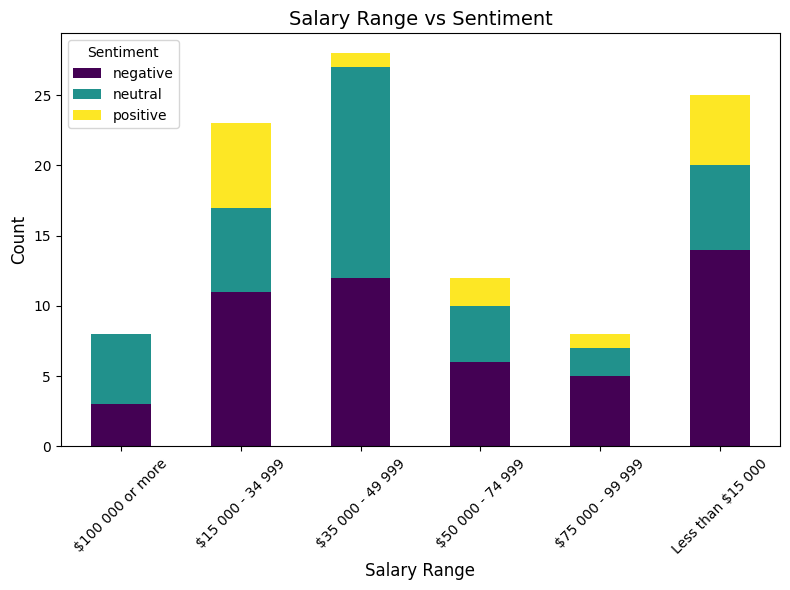

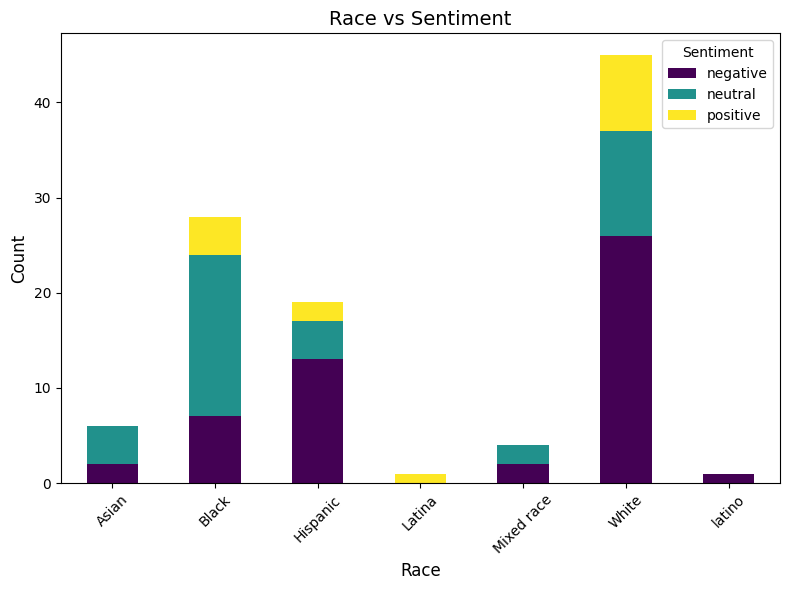

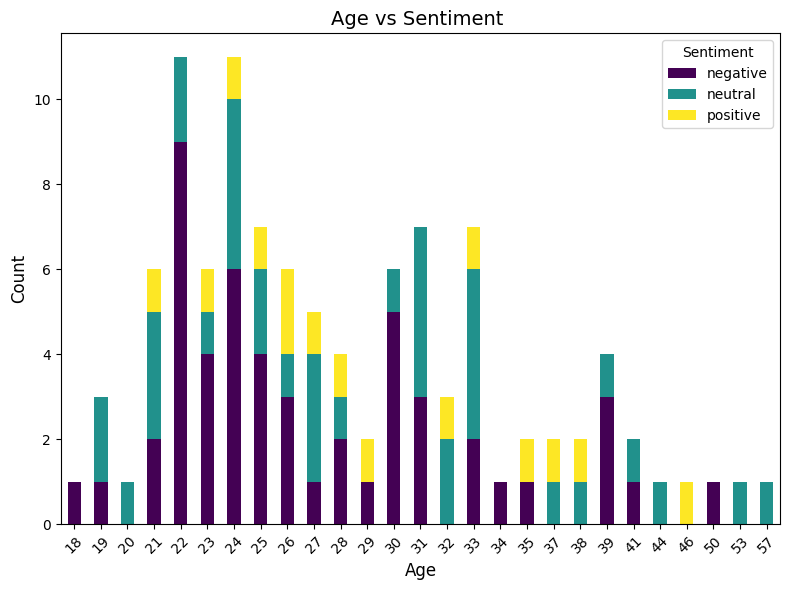

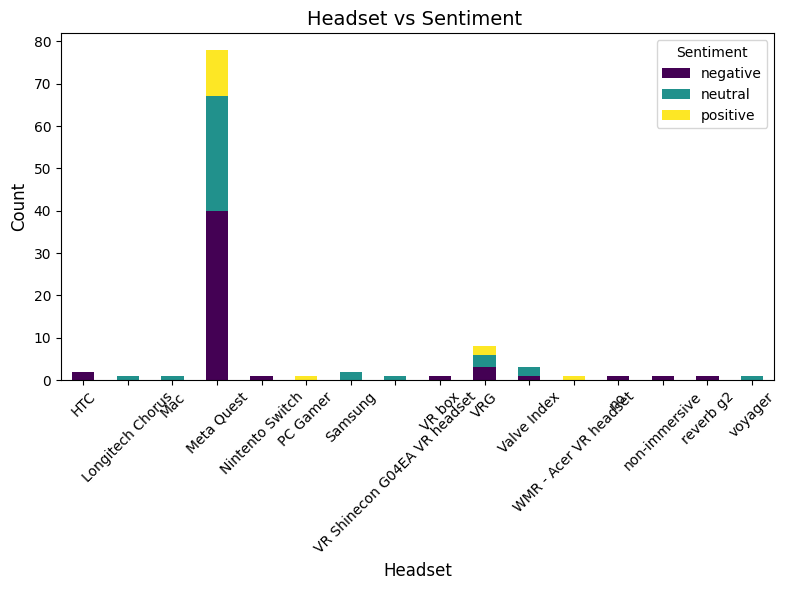

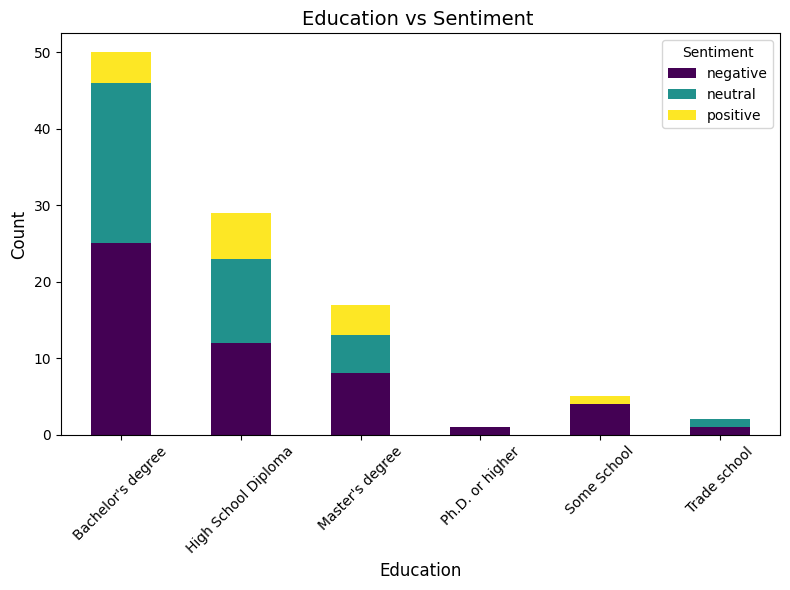

In [75]:
#Plotting textblob results
#Replace df['textblob_sentiment'] with df['vader_sentiment'] to ploot vader results

#Income vs sentiment
pivot_table = pd.crosstab(df['Annual income (USD)'], df['textblob_sentiment'])
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title("Salary Range vs Sentiment", fontsize=14)
plt.xlabel("Salary Range", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

plt.show()

#Race vs sentiment
pivot_table = pd.crosstab(df['Race'], df['textblob_sentiment'])
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title("Race vs Sentiment", fontsize=14)
plt.xlabel("Race", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

plt.show()

#Age vs sentiment
pivot_table = pd.crosstab(df['Age'], df['textblob_sentiment'])
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title("Age vs Sentiment ", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

plt.show()

#Headset vs sentiment
pivot_table = pd.crosstab(df['Headset'], df['textblob_sentiment'])
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title("Headset vs Sentiment ", fontsize=14)
plt.xlabel("Headset", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

plt.show()

#Education vs sentiment
pivot_table = pd.crosstab(df['Education'], df['textblob_sentiment'])
pivot_table.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title("Education vs Sentiment ", fontsize=14)
plt.xlabel("Education", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment", fontsize=10)
plt.tight_layout()

plt.show()



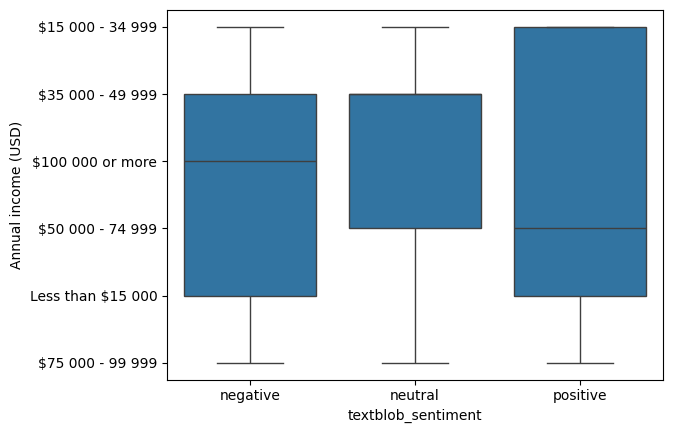

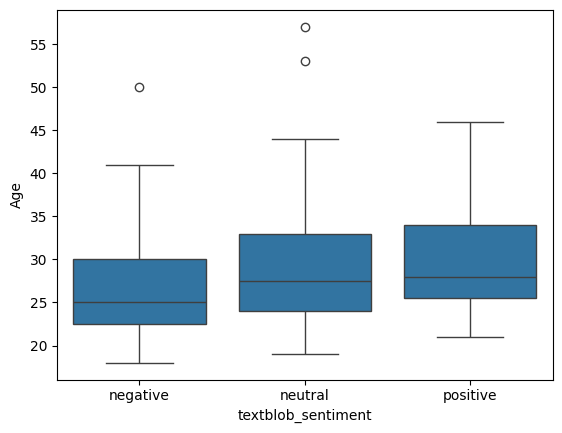

In [76]:
sns.boxplot(data=df, x='textblob_sentiment', y='Annual income (USD)')
plt.show()

sns.boxplot(data=df, x='textblob_sentiment', y='Age')
plt.show()